## **SCORING - Soluble Epoxide Hydrolase**
#### **Micha Birklbauer 2021-10-08**

In [1]:
import os
from shutil import copyfile
from itertools import islice
copyfile("../../scripts/python/PIAScore.py", "PIAScore.py")

'PIAScore.py'

In [2]:
import pandas as pd
from PIAScore import *

#### **Load data:**

In [3]:
data_train = pd.read_csv("data_train.csv")
data_val = pd.read_csv("data_val.csv")
data_test = pd.read_csv("data_test.csv")
features = pd.read_csv("features.csv")

In [4]:
# data_train.info()

In [5]:
data_train

,INDEX,NAME,Halogen_Bond:SER370A,Hydrogen_Bond:TRP336A,Water_Bridge:HIS524A,Halogen_Bond:ASP496A,Salt_Bridge:HIS524A,Hydrogen_Bond:PHE497A,Salt_Bridge:ASP335A,Halogen_Bond:TYR343A,...,Hydrogen_Bond:TYR343A,Water_Bridge:TRP525A,Hydrogen_Bond:TYR466A,Halogen_Bond:MET369A,Halogen_Bond:ASN472A,Water_Bridge:PHE267A,Hydrophobic_Interaction:PHE362A,Halogen_Bond:ASN378A,Hydrophobic_Interaction:TYR466A,LABEL
0,1,IA_40|SeH_inactivess_minimized|sdf|127,0,0,0,0,1,0,0,0,...,0,1,2,0,0,2,0,0,0,inactive
1,2,A_19|SEH_inhibs_minimized|sdf|18,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,1,0,1,active
2,3,IA_11|SeH_inactivess_minimized|sdf|12,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,inactive
3,4,IA_149.cdx|SeH_inactivess_minimized|sdf|50,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
4,5,A_103|SEH_inhibs_minimized|sdf|5,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,IA_55.cdx|SeH_inactivess_minimized|sdf|140,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
146,147,IA_95.cdx|SeH_inactivess_minimized|sdf|174,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
147,148,IA_179.cdx|SeH_inactivess_minimized|sdf|80,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,inactive
148,149,IA_70.cdx|SeH_inactivess_minimized|sdf|148,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,inactive


In [6]:
print("Training dataset shape & Nr. of actives:")
print(data_train.shape, len(data_train.loc[data_train["LABEL"] == "active"]))

Training dataset shape & Nr. of actives:
(150, 82) 37


In [7]:
print("Validation dataset shape & Nr. of actives:")
print(data_val.shape, len(data_val.loc[data_val["LABEL"] == "active"]))

Validation dataset shape & Nr. of actives:
(38, 82) 10


In [8]:
print("Test dataset shape & Nr. of actives:")
print(data_test.shape, len(data_test.loc[data_test["LABEL"] == "active"]))

Test dataset shape & Nr. of actives:
(48, 82) 11


In [9]:
features

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrophobic_Interaction:TRP525A,0.303516,0.648649,0.345133
1,2,Hydrogen_Bond:TYR466A,0.296819,1.270270,0.973451
2,3,Hydrophobic_Interaction:LEU499A,0.259268,0.648649,0.389381
3,4,Hydrophobic_Interaction:TYR466A,0.242526,0.702703,0.460177
4,5,Hydrophobic_Interaction:TYR383A,0.203301,0.486486,0.283186
...,...,...,...,...,...
74,75,Halogen_Bond:ASN472A,0.008850,0.000000,0.008850
75,76,Hydrophobic_Interaction:LEU417A,0.008371,0.027027,0.035398
76,77,Hydrogen_Bond:VAL498A,0.007893,0.054054,0.061947
77,78,Pi-Cation_Interaction:HIS524A,0.007414,0.081081,0.088496


#### **Extract relevant features:**

In [10]:
optimized_values = get_optimized_feature_thresholds(features, data_train)

In [11]:
for item in islice(optimized_values["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.05, 0.0, 0.0: strat1 Accuracy: 0.88
Key: 0.05, 0.05, 0.0: strat1 Accuracy: 0.88
Key: 0.05, 0.1, 0.0: strat1 Accuracy: 0.88
Key: 0.0, 0.0, 0.0: strat1 Accuracy: 0.8733333333333333
Key: 0.0, 0.0, 0.0: strat3 Accuracy: 0.8666666666666667


In [12]:
for item in islice(optimized_values["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.0, 0.0, 0.0: strat1 Area under the ROC curve: 0.8911743602009089
Key: 0.0, 0.0, 0.0: strat3 Area under the ROC curve: 0.8838794546759149
Key: 0.1, 0.0, 0.0: strat3 Area under the ROC curve: 0.8788567328390336
Key: 0.1, 0.05, 0.0: strat3 Area under the ROC curve: 0.8718010045443674
Key: 0.0, 0.0, 0.0: strat4 Area under the ROC curve: 0.8639081559435542


In [13]:
optimized_values_val = get_optimized_feature_thresholds(features, data_train, data_val)

In [14]:
for item in islice(optimized_values_val["ACC"].items(), 5):
    print('Key: {} Accuracy: {}'.format(item[0], item[1]))

Key: 0.05, 0.0, 0.1: strat3 Accuracy: 0.7894736842105263
Key: 0.05, 0.05, 0.1: strat3 Accuracy: 0.7894736842105263
Key: 0.0, 0.0, 0.05: strat3 Accuracy: 0.7631578947368421
Key: 0.0, 0.0, 0.1: strat3 Accuracy: 0.7631578947368421
Key: 0.0, 0.0, 0.15000000000000002: strat3 Accuracy: 0.7631578947368421


In [15]:
for item in islice(optimized_values_val["AUC"].items(), 5):
    print('Key: {} Area under the ROC curve: {}'.format(item[0], item[1]))

Key: 0.15000000000000002, 0.0, 0.1: strat1 Area under the ROC curve: 0.7
Key: 0.15000000000000002, 0.0, 0.15000000000000002: strat1 Area under the ROC curve: 0.7
Key: 0.15000000000000002, 0.05, 0.1: strat1 Area under the ROC curve: 0.7
Key: 0.15000000000000002, 0.05, 0.1: strat3 Area under the ROC curve: 0.7
Key: 0.15000000000000002, 0.05, 0.15000000000000002: strat1 Area under the ROC curve: 0.7


In [16]:
features_filtered = get_relevant_features(features, 0.05, 0.05, 0.1)
features_filtered

,INDEX,INTERACTION,DIFFERENCE,ACTIVE_FREQUENCY,INACTIVE_FREQUENCY
0,1,Hydrophobic_Interaction:TRP525A,0.303516,0.648649,0.345133
1,2,Hydrogen_Bond:TYR466A,0.296819,1.270270,0.973451
2,3,Hydrophobic_Interaction:LEU499A,0.259268,0.648649,0.389381
3,4,Hydrophobic_Interaction:TYR466A,0.242526,0.702703,0.460177
4,5,Hydrophobic_Interaction:TYR383A,0.203301,0.486486,0.283186
5,6,Hydrophobic_Interaction:HIS524A,0.202344,0.432432,0.230088
8,9,Pi-Stacking:HIS524A,0.156183,0.324324,0.168142
9,10,Hydrogen_Bond:TYR383A,0.149007,0.081081,0.230088
10,11,Hydrophobic_Interaction:TRP336A,0.148051,0.864865,0.716814
13,14,Pi-Stacking:TRP336A,0.125568,0.594595,0.469027


In [17]:
# some error checking -- should print nothing
for item in features_filtered["INTERACTION"].to_list():
    if item not in data_train.columns.to_list():
        print(item)

#### **Get positive features (e.g. features that have a positive impact on activeness) and negative features:**

In [18]:
positives, negatives = get_feature_impact(features_filtered)

In [19]:
positives

['Hydrophobic_Interaction:TRP525A',
 'Hydrogen_Bond:TYR466A',
 'Hydrophobic_Interaction:LEU499A',
 'Hydrophobic_Interaction:TYR466A',
 'Hydrophobic_Interaction:TYR383A',
 'Hydrophobic_Interaction:HIS524A',
 'Pi-Stacking:HIS524A',
 'Hydrophobic_Interaction:TRP336A',
 'Pi-Stacking:TRP336A',
 'Hydrogen_Bond:HIS524A',
 'Hydrophobic_Interaction:PHE267A',
 'Hydrophobic_Interaction:THR360A',
 'Hydrophobic_Interaction:MET339A']

In [20]:
negatives

['Hydrogen_Bond:TYR383A',
 'Water_Bridge:PHE267A',
 'Hydrophobic_Interaction:PRO371A',
 'Salt_Bridge:HIS524A',
 'Hydrogen_Bond:ASP496A',
 'Hydrogen_Bond:GLN384A',
 'Hydrophobic_Interaction:MET469A']

#### **Score Compounds with different strategies & save results:**

In [21]:
save = False

# make data copies
train_result_strat1 = data_train.copy()
train_result_strat2 = data_train.copy()
train_result_strat3 = data_train.copy()
train_result_strat4 = data_train.copy()
# calculate scores
train_result_strat1["SCORE"] = train_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
train_result_strat2["SCORE"] = train_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
train_result_strat3["SCORE"] = train_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
train_result_strat4["SCORE"] = train_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
train_result_strat1_sorted = train_result_strat1.sort_values(by = "SCORE", ascending = False)
train_result_strat2_sorted = train_result_strat2.sort_values(by = "SCORE", ascending = False)
train_result_strat3_sorted = train_result_strat3.sort_values(by = "SCORE", ascending = False)
train_result_strat4_sorted = train_result_strat4.sort_values(by = "SCORE", ascending = False)
# save data
if save:
    train_result_strat1_sorted.to_csv("train_scores1.csv")
    train_result_strat2_sorted.to_csv("train_scores2.csv")
    train_result_strat3_sorted.to_csv("train_scores3.csv")
    train_result_strat4_sorted.to_csv("train_scores4.csv")

#### **Find best cutoff value and print metrics:**

*cutoff/accuracy for different strategies:*

In [22]:
print(
"Strategy 1: ",
get_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list()),
"\nStrategy 2: ",
get_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list()),
"\nStrategy 3: ",
get_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list()),
"\nStrategy 4: ",
get_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list())
)

Strategy 1:  [8, 0.84] 
Strategy 2:  [9, 0.8133333333333334] 
Strategy 3:  [7, 0.82] 
Strategy 4:  [8, 0.8066666666666666]


*accuracy for best cutoff:*

In [23]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 8, "accuracy"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 9, "accuracy"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 7, "accuracy"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 8, "accuracy")
)

Strategy 1:  0.84 
Strategy 2:  0.8133333333333334 
Strategy 3:  0.82 
Strategy 4:  0.8066666666666666


*false positive rate for best cutoff:*

In [24]:
print(
"Strategy 1: ",
test_cutoff(train_result_strat1["LABEL"].to_list(), train_result_strat1["SCORE"].to_list(), 8, "fpr"),
"\nStrategy 2: ",
test_cutoff(train_result_strat2["LABEL"].to_list(), train_result_strat2["SCORE"].to_list(), 9, "fpr"),
"\nStrategy 3: ",
test_cutoff(train_result_strat3["LABEL"].to_list(), train_result_strat3["SCORE"].to_list(), 7, "fpr"),
"\nStrategy 4: ",
test_cutoff(train_result_strat4["LABEL"].to_list(), train_result_strat4["SCORE"].to_list(), 8, "fpr")
)

Strategy 1:  0.035398230088495575 
Strategy 2:  0.05309734513274336 
Strategy 3:  0.061946902654867256 
Strategy 4:  0.07964601769911504


#### **Calculate validation and test results:**

In [25]:
# make data copies
val_result_strat1 = data_val.copy()
val_result_strat2 = data_val.copy()
val_result_strat3 = data_val.copy()
val_result_strat4 = data_val.copy()
# calculate scores
val_result_strat1["SCORE"] = val_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
val_result_strat2["SCORE"] = val_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
val_result_strat3["SCORE"] = val_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
val_result_strat4["SCORE"] = val_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
val_result_strat1_sorted = val_result_strat1.sort_values(by = "SCORE", ascending = False)
val_result_strat2_sorted = val_result_strat2.sort_values(by = "SCORE", ascending = False)
val_result_strat3_sorted = val_result_strat3.sort_values(by = "SCORE", ascending = False)
val_result_strat4_sorted = val_result_strat4.sort_values(by = "SCORE", ascending = False)

In [26]:
# make data copies
test_result_strat1 = data_test.copy()
test_result_strat2 = data_test.copy()
test_result_strat3 = data_test.copy()
test_result_strat4 = data_test.copy()
# calculate scores
test_result_strat1["SCORE"] = test_result_strat1.apply(lambda x: score(x, positives, negatives, "+"), axis = 1)
test_result_strat2["SCORE"] = test_result_strat2.apply(lambda x: score(x, positives, negatives, "++"), axis = 1)
test_result_strat3["SCORE"] = test_result_strat3.apply(lambda x: score(x, positives, negatives, "+-"), axis = 1)
test_result_strat4["SCORE"] = test_result_strat4.apply(lambda x: score(x, positives, negatives, "++--"), axis = 1)
# sort data
test_result_strat1_sorted = test_result_strat1.sort_values(by = "SCORE", ascending = False)
test_result_strat2_sorted = test_result_strat2.sort_values(by = "SCORE", ascending = False)
test_result_strat3_sorted = test_result_strat3.sort_values(by = "SCORE", ascending = False)
test_result_strat4_sorted = test_result_strat4.sort_values(by = "SCORE", ascending = False)

#### **Quality metrics for training and validation data:**

*training data:*

In [27]:
print(
"Strategy 1: ",
get_metrics(train_result_strat1, 8, pretty_print = True),
"\nStrategy 2: ",
get_metrics(train_result_strat2, 9, pretty_print = True),
"\nStrategy 3: ",
get_metrics(train_result_strat3, 7, pretty_print = True),
"\nStrategy 4: ",
get_metrics(train_result_strat4, 8, pretty_print = True)
)

Strategy 1:  {'ACC': 0.84, 'FPR': 0.035398230088495575, 'AUC': 0.785099258550586, 'Ya': 0.8095238095238095, 'EF': 3.281853281853282, 'REF': 80.95238095238095} 
Strategy 2:  {'ACC': 0.8133333333333334, 'FPR': 0.05309734513274336, 'AUC': 0.7618990672088016, 'Ya': 0.7142857142857143, 'EF': 2.8957528957528957, 'REF': 71.42857142857143} 
Strategy 3:  {'ACC': 0.82, 'FPR': 0.061946902654867256, 'AUC': 0.7774455871801005, 'Ya': 0.7083333333333334, 'EF': 2.8716216216216215, 'REF': 70.83333333333333} 
Strategy 4:  {'ACC': 0.8066666666666666, 'FPR': 0.07964601769911504, 'AUC': 0.7592681176751973, 'Ya': 0.6538461538461539, 'EF': 2.6507276507276507, 'REF': 65.38461538461539}


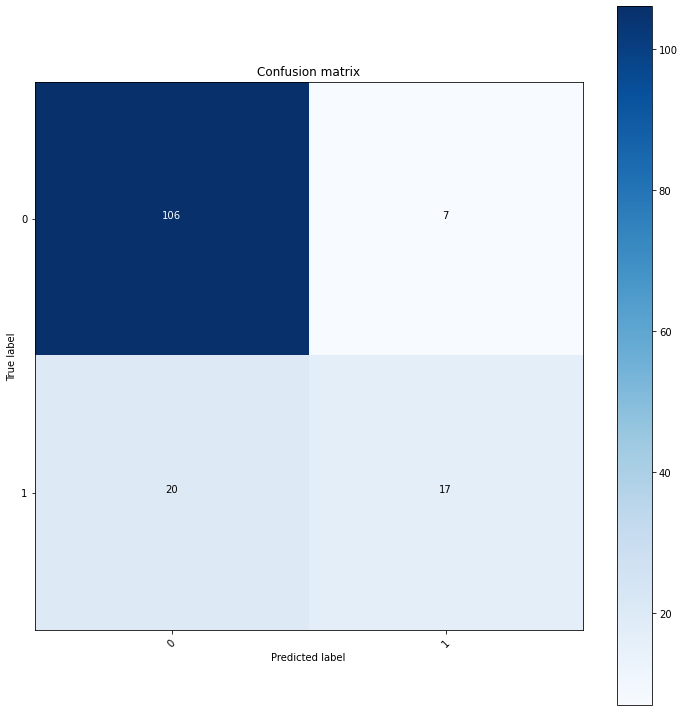

In [28]:
plot_confusion_matrix(get_metrics(train_result_strat3, 7)["CM"], classes = [0, 1], filename = "results/CM_train_strat3.png");

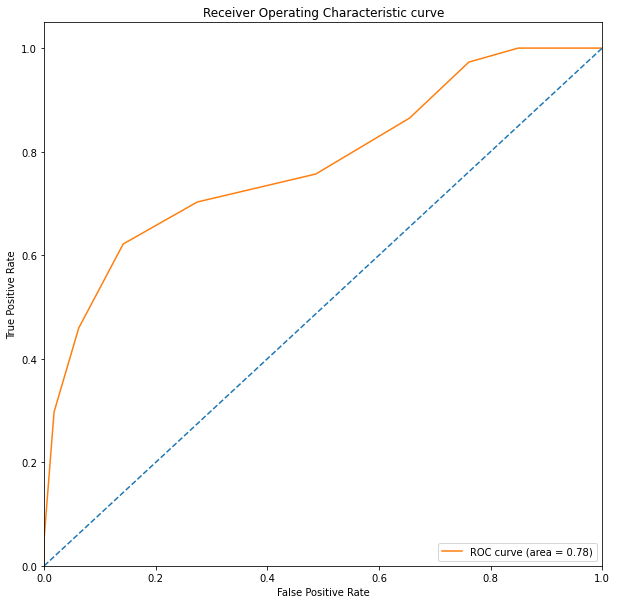

In [29]:
roc = get_metrics(train_result_strat3, 7)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_train_strat3.png");

*validation data:*

In [30]:
print(
"Strategy 1: ",
get_metrics(val_result_strat1, 8, pretty_print = True),
"\nStrategy 2: ",
get_metrics(val_result_strat2, 9, pretty_print = True),
"\nStrategy 3: ",
get_metrics(val_result_strat3, 7, pretty_print = True),
"\nStrategy 4: ",
get_metrics(val_result_strat4, 8, pretty_print = True)
)

Strategy 1:  {'ACC': 0.7105263157894737, 'FPR': 0.07142857142857142, 'AUC': 0.6267857142857144, 'Ya': 0.3333333333333333, 'EF': 1.2666666666666666, 'REF': 33.333333333333336} 
Strategy 2:  {'ACC': 0.7105263157894737, 'FPR': 0.07142857142857142, 'AUC': 0.5946428571428571, 'Ya': 0.3333333333333333, 'EF': 1.2666666666666666, 'REF': 33.333333333333336} 
Strategy 3:  {'ACC': 0.7894736842105263, 'FPR': 0.03571428571428571, 'AUC': 0.5303571428571429, 'Ya': 0.75, 'EF': 2.85, 'REF': 75.0} 
Strategy 4:  {'ACC': 0.7631578947368421, 'FPR': 0.03571428571428571, 'AUC': 0.49464285714285716, 'Ya': 0.6666666666666666, 'EF': 2.533333333333333, 'REF': 66.66666666666667}


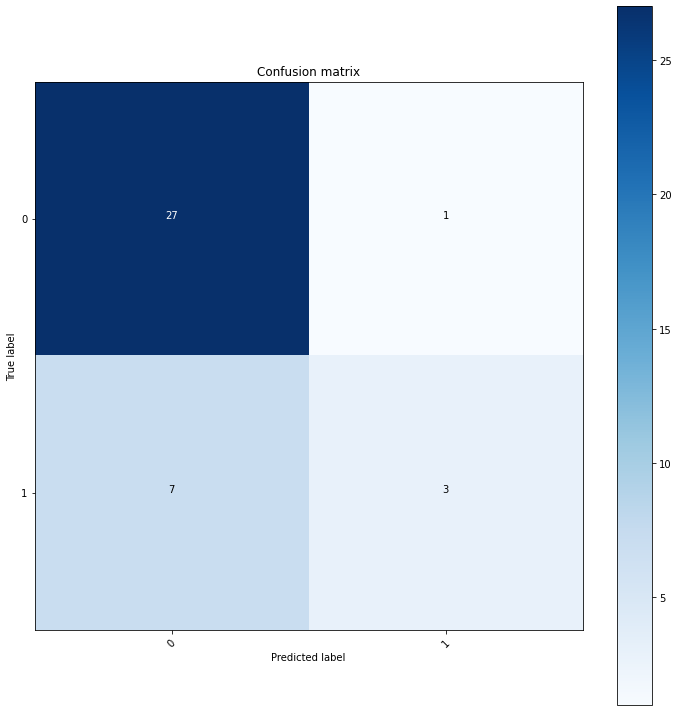

In [31]:
plot_confusion_matrix(get_metrics(val_result_strat3, 7)["CM"], classes = [0, 1], filename = "results/CM_val_strat3.png");

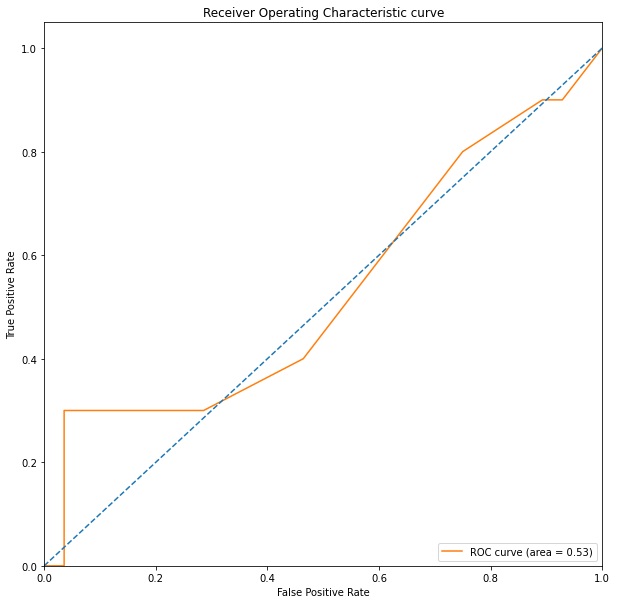

In [32]:
roc = get_metrics(val_result_strat3, 7)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_val_strat3.png");

*test data:*

In [33]:
print(
"Strategy 1: ",
get_metrics(test_result_strat1, 8, pretty_print = True),
"\nStrategy 2: ",
get_metrics(test_result_strat2, 9, pretty_print = True),
"\nStrategy 3: ",
get_metrics(test_result_strat3, 7, pretty_print = True),
"\nStrategy 4: ",
get_metrics(test_result_strat4, 8, pretty_print = True)
)

Strategy 1:  {'ACC': 0.7916666666666666, 'FPR': 0.05405405405405406, 'AUC': 0.6793611793611793, 'Ya': 0.6, 'EF': 2.618181818181818, 'REF': 60.0} 
Strategy 2:  {'ACC': 0.7708333333333334, 'FPR': 0.08108108108108109, 'AUC': 0.6547911547911547, 'Ya': 0.5, 'EF': 2.181818181818182, 'REF': 50.0} 
Strategy 3:  {'ACC': 0.8125, 'FPR': 0.05405405405405406, 'AUC': 0.7321867321867322, 'Ya': 0.6666666666666666, 'EF': 2.909090909090909, 'REF': 66.66666666666667} 
Strategy 4:  {'ACC': 0.7708333333333334, 'FPR': 0.08108108108108109, 'AUC': 0.7113022113022113, 'Ya': 0.5, 'EF': 2.181818181818182, 'REF': 50.0}


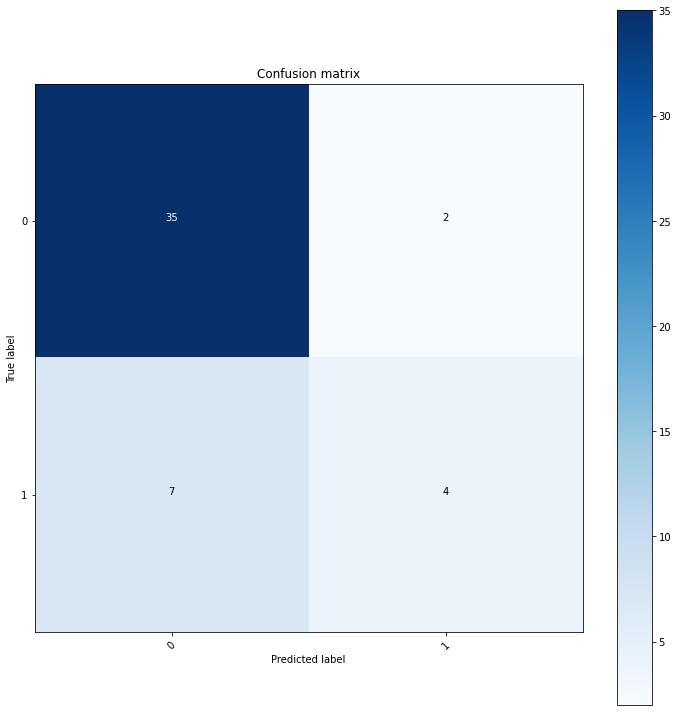

In [34]:
plot_confusion_matrix(get_metrics(test_result_strat3, 7)["CM"], classes = [0, 1], filename = "results/CM_test_strat3.png");

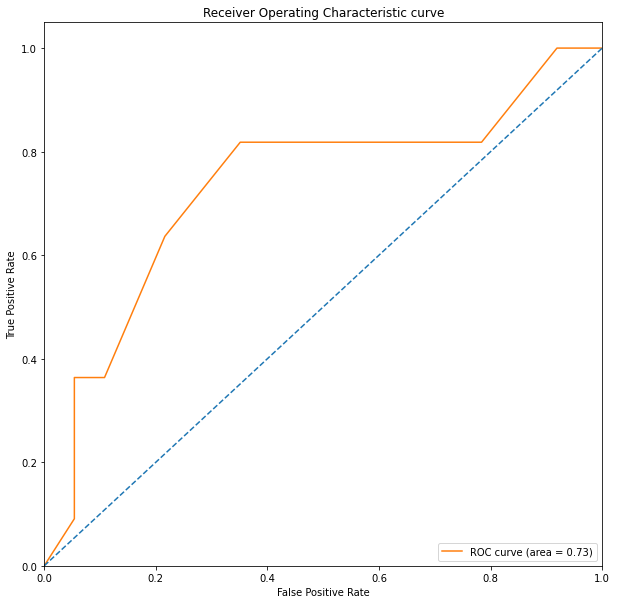

In [35]:
roc = get_metrics(test_result_strat3, 7)["ROC"]
plot_ROC_curve(roc["fpr"], roc["tpr"], filename = "results/ROC_test_strat3.png");

#### **Clean up:**

In [36]:
os.remove("PIAScore.py")